<a href="https://colab.research.google.com/github/Monocyte572/project/blob/main/project%20/Pixel_RGB/RGB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pillow

In [ ]:
## #그림 불러오기 및 그림 크기 확인
from PIL import Image
import numpy as np
im=Image.open('/sample.jpg')
pix=np.array(im)
print(im.size)

(3007, 2255)


In [ ]:
## 픽셀 별 RGB 추출한 다음, 배경 제거
height, width = pix.shape[0], pix.shape[1]
print(f"이미지 크기: {width} x {height}")

rgb_values = []

for y in range(height):
    for x in range(width):
        rgb = pix[y][x]
        rgb_values.append(rgb)

height, width = pix.shape[0], pix.shape[1]

pixel_count = 0
filtered_pixels = []

for y in range(height):
    for x in range(width):
        r, g, b = pix[y][x]

        ## 제거 조건: 하나라도 100 미만이면 건너뜀
        if r < 100 or g < 100:
            pixel_count += 1
            continue

        filtered_pixels.append([pixel_count, x, y, r, g, b])
        pixel_count += 1

print(f"Filtered pixel count: {len(filtered_pixels)}")



이미지 크기: 3007 x 2255
Pixel 0: [64 60 59]
Pixel 1: [64 60 59]
Pixel 2: [62 61 59]
Pixel 3: [62 61 59]
Pixel 4: [61 60 58]
Pixel 5: [61 60 58]
Pixel 6: [60 61 56]
Pixel 7: [60 61 56]
Pixel 8: [60 61 56]
Pixel 9: [60 61 56]


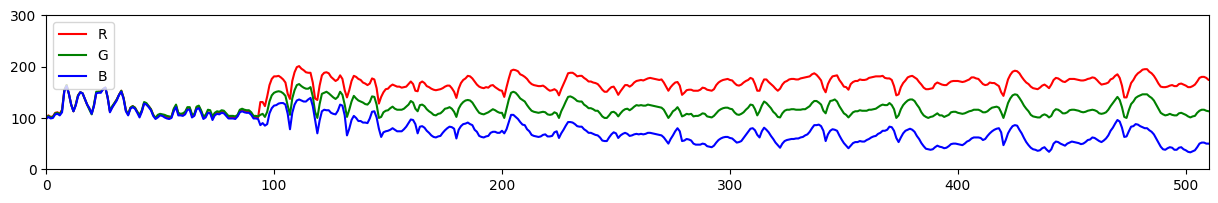

In [ ]:
## 그래프 표현 및 엑셀 저장
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(filtered_pixels, columns=['Pixel_Index', 'X', 'Y', 'R', 'G', 'B'])
df.to_csv('/filtered_rgb.csv', index=False)

#그래프 표현
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv('/filtered_rgb.csv')
plt.figure(figsize=(15,2))
plt.plot(data['R'], c='r', label='R')
plt.plot(data['G'], c='g', label='G')
plt.plot(data['B'], c='b', label='B')
plt.legend()
plt.xlim(0,510)
plt.ylim(0,300)
plt.savefig('/filtering_RGB.png')
plt.show()